In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
## Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
#read  the csv file
df = pd.read_csv('train.csv')

# View the first five rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# DATA CLEANING


In [3]:
#check missing value percentage
percent_missing = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Utilities        0.000000
dtype: float64

Below mentioned are not actually missing values, they have value 'NA' which implies 'NO'. So we have to replace by 'none'

- PoolQC          99.520548
- MiscFeature     96.301370
- Alley           93.767123
- Fence           80.753425
- FireplaceQu     47.260274
- BsmtExposure     2.602740
- BsmtFinType2     2.602740
- BsmtFinType1     2.534247
- BsmtCond         2.534247 
- BsmtQual         2.534247
- GarageCond       5.547945
- GarageType       5.547945
- GarageFinish     5.547945
- GarageQual       5.547945


In [4]:
df = pd.read_csv('train.csv', keep_default_na=False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [5]:
#replacing all 'NA' by 'None'
df[['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','GarageCond','GarageType','GarageFinish','GarageQual']]=df[['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','GarageCond','GarageType','GarageFinish','GarageQual']].replace("NA","None")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [6]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

- converting MSSubClass,OverallQual ,OverallCond are really 'object' in type so we need to convert to object
- LotFrontage , MasVnrArea need to convert to 'numeric'

In [7]:
#converting  to object type
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
# converting to numeric type
df['LotFrontage']=pd.to_numeric(df['LotFrontage'],errors='coerce')
df['MasVnrArea']=pd.to_numeric(df['MasVnrArea'],errors='coerce')
df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [8]:
#now checking again missing value
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [9]:
#replacing missing value by mean
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

In [10]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [11]:
## Create new column for the age of the house
df['Age'] = df['YrSold'] - df['YearBuilt']

In [12]:
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,WD,Normal,250000,8


# EDA

In [13]:
# data frame into numeric columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

,Id,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age
0,1,65.0,8450,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,208500,5
1,2,80.0,9600,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,181500,31
2,3,68.0,11250,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,223500,7
3,4,60.0,9550,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,140000,91
4,5,84.0,14260,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,250000,8


In [14]:
#data frame into categorical columns
df_cat = df.select_dtypes(include='object')
df_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,2003,RFn,TA,TA,Y,None,None,None,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976,RFn,TA,TA,Y,None,None,None,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001,RFn,TA,TA,Y,None,None,None,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000,RFn,TA,TA,Y,None,None,None,WD,Normal


# EDA on Numeric columns

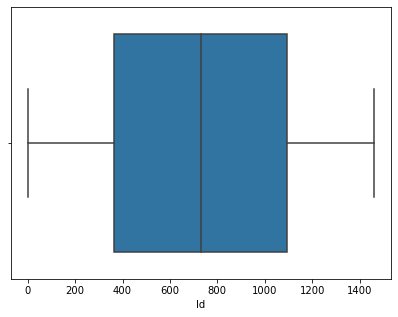

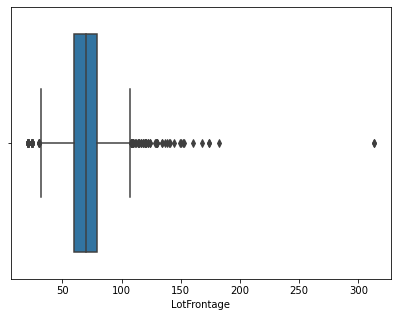

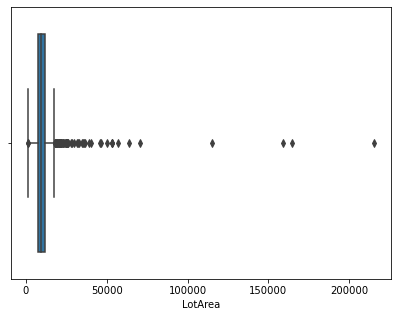

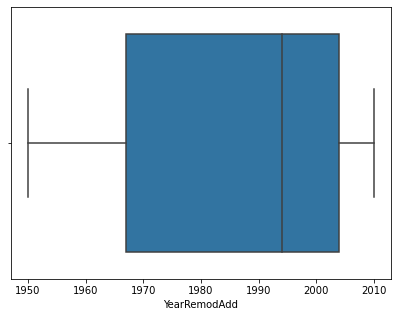

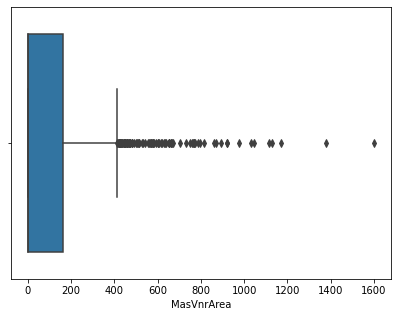

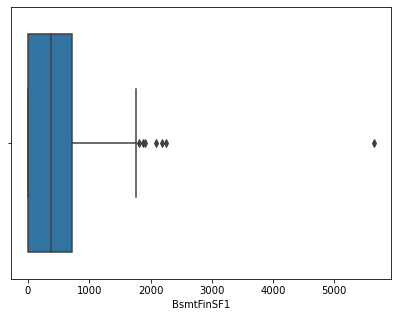

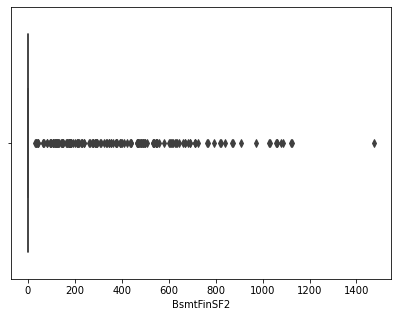

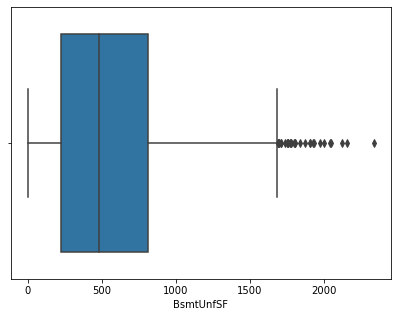

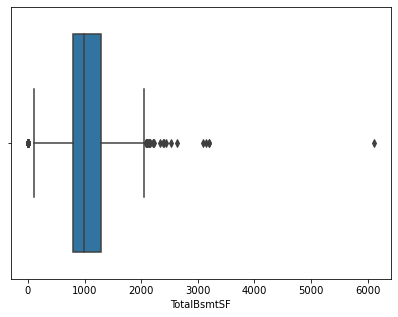

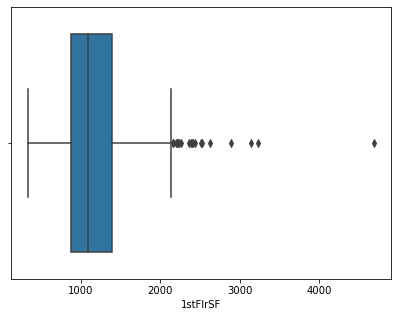

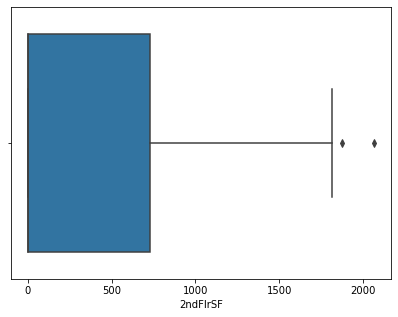

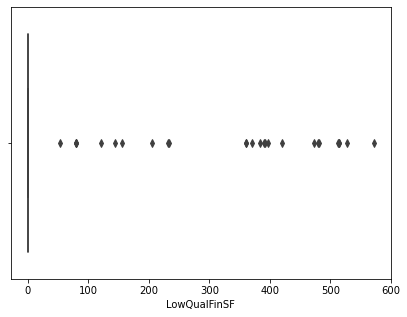

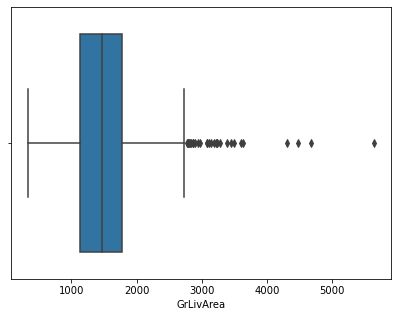

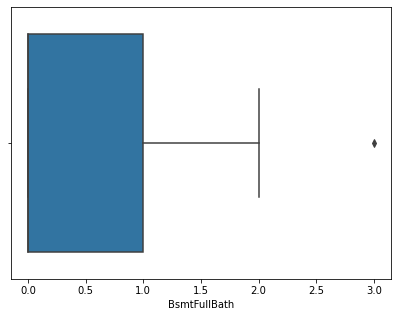

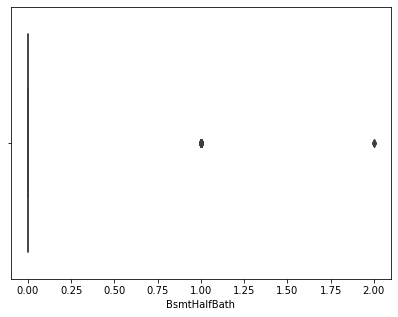

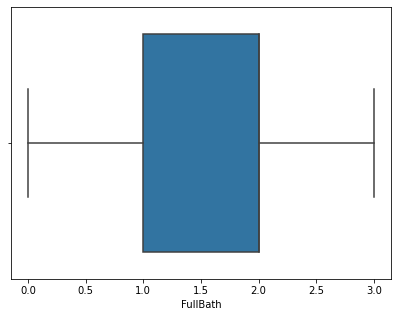

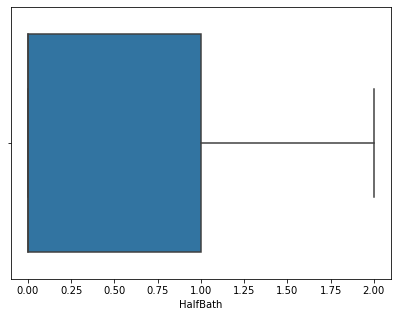

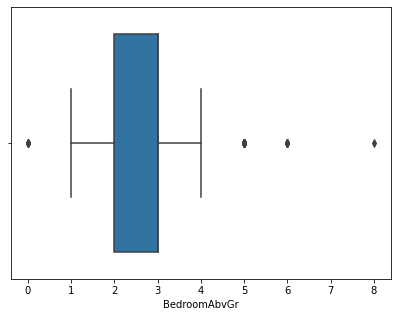

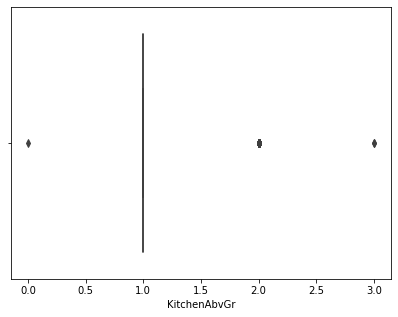

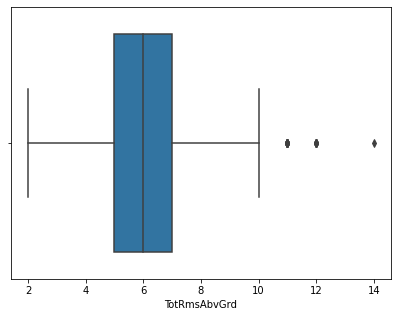

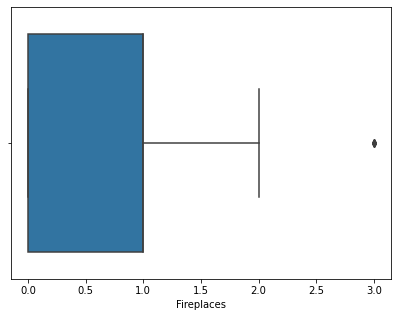

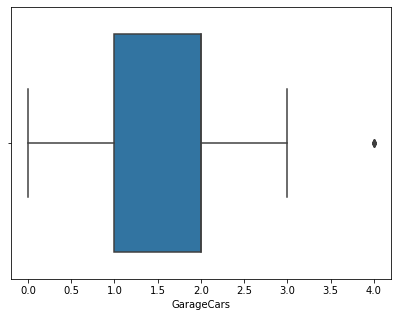

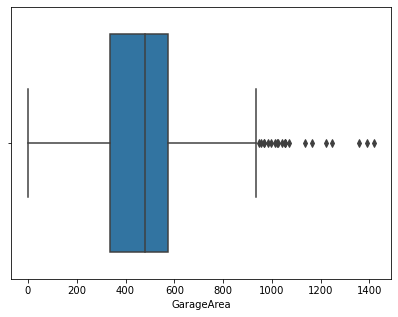

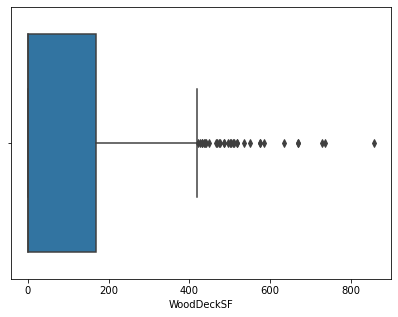

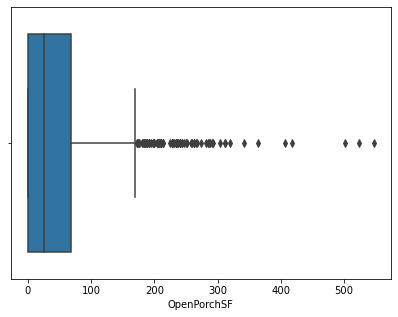

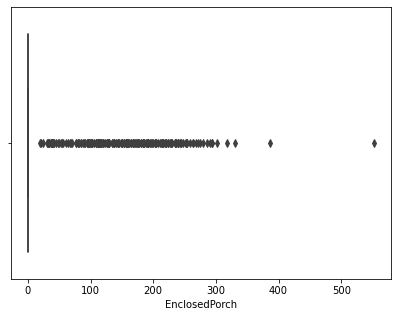

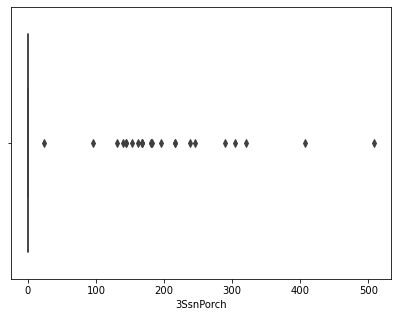

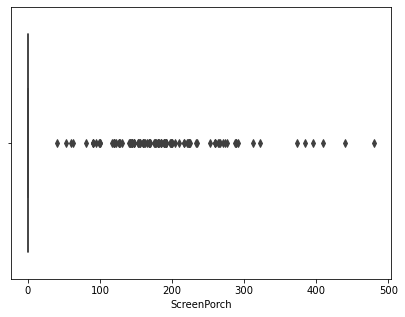

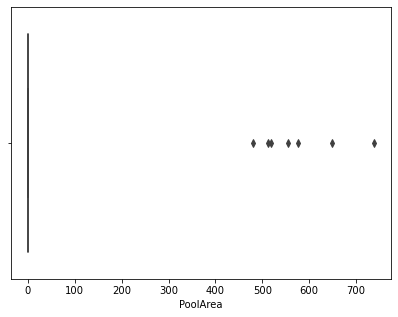

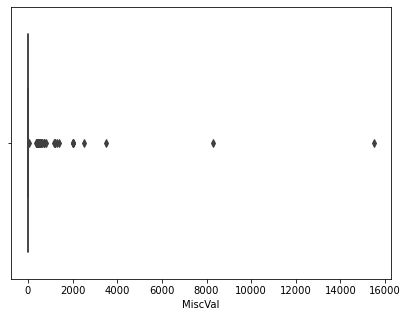

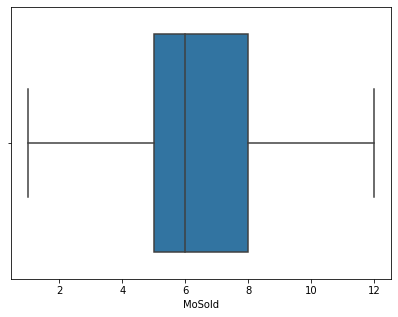

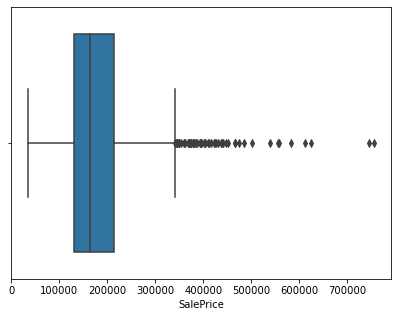

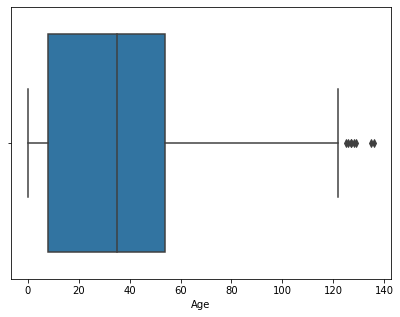

In [15]:
#checking the distribution of numeric variables
for col in df_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,2)
    sns.boxplot(df_num[col])
    plt.show()

## Most of the variables have outliers. Outlier treatment is required

## EDA on categorical variables

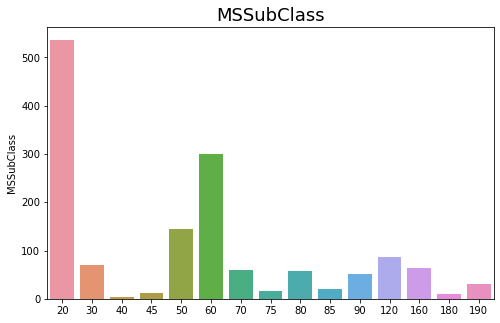

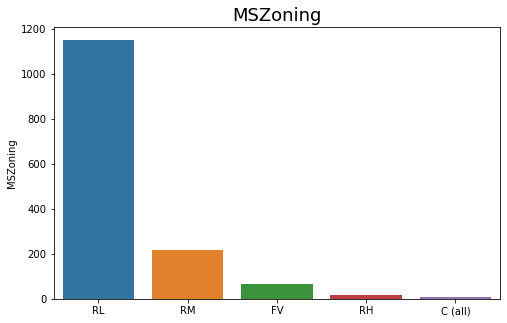

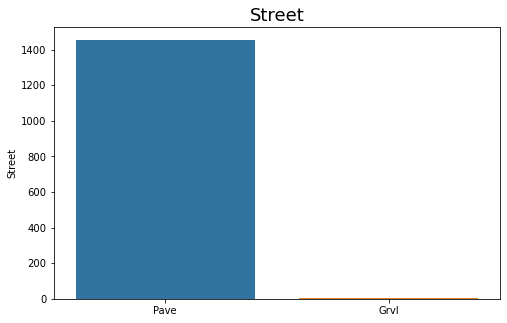

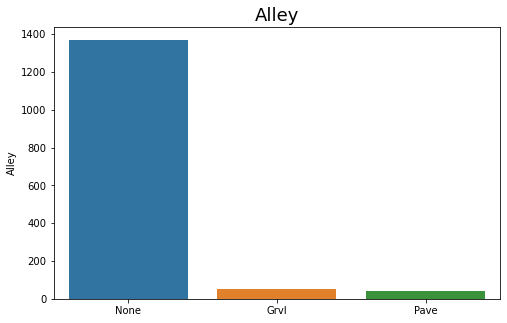

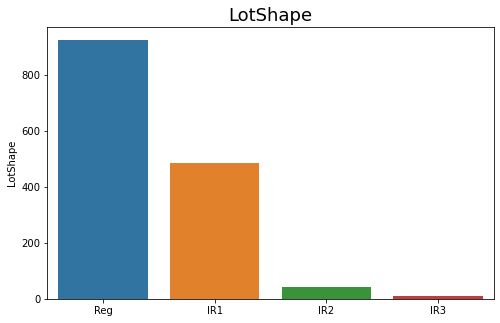

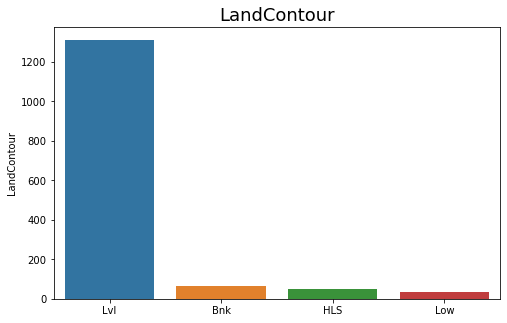

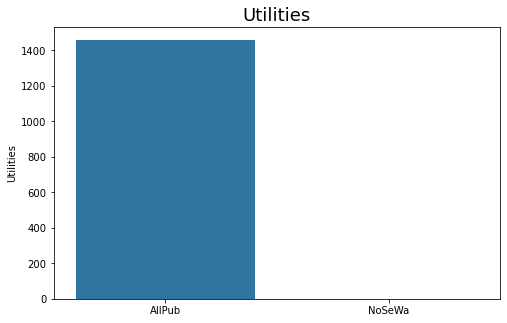

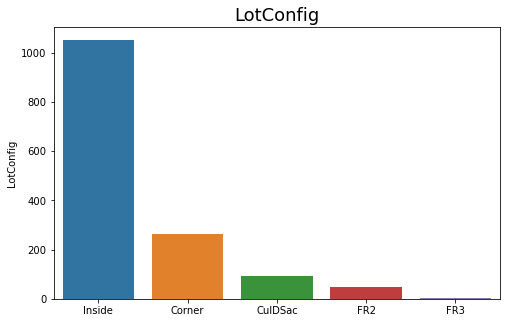

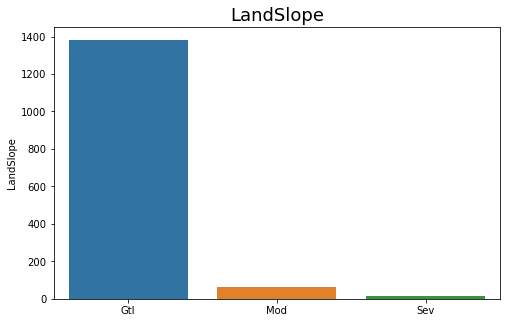

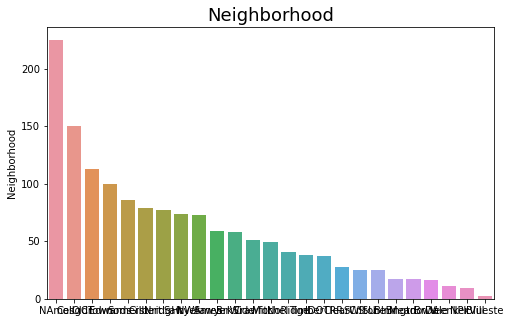

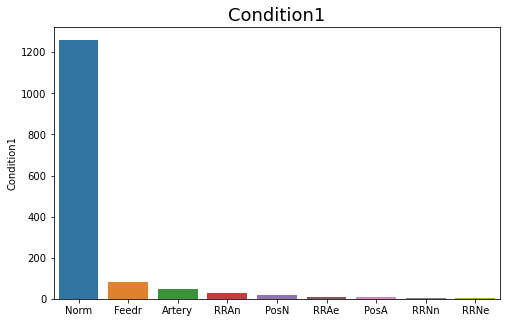

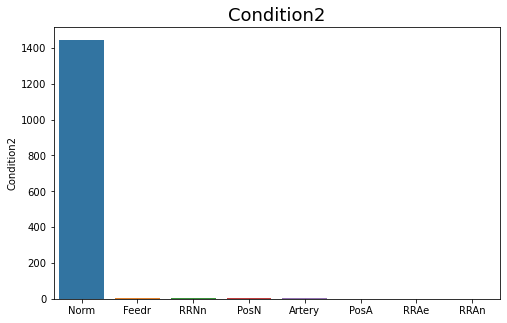

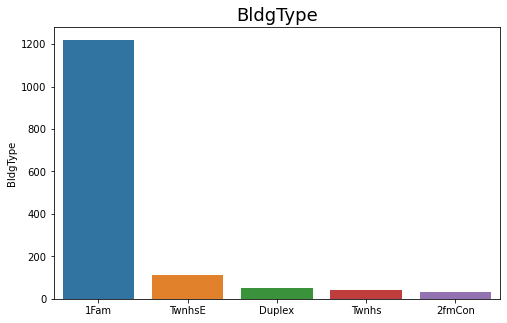

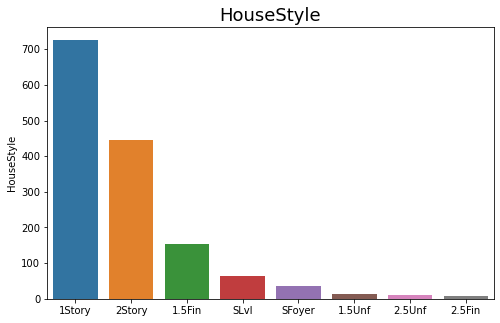

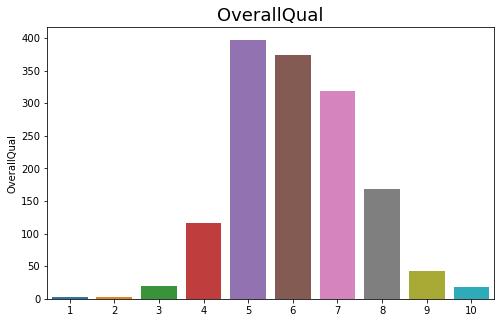

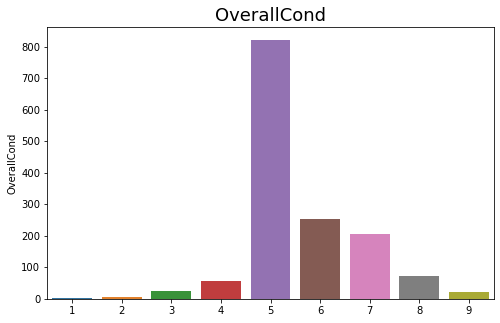

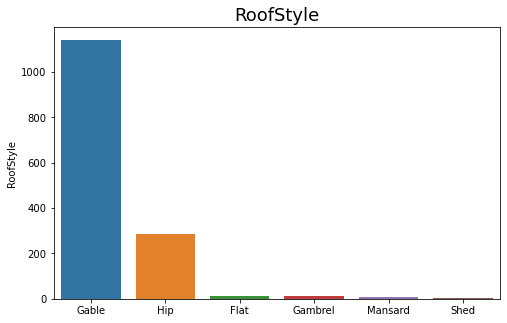

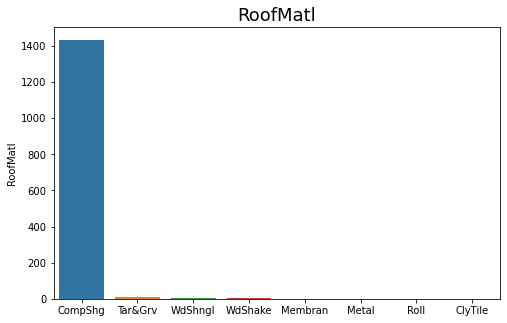

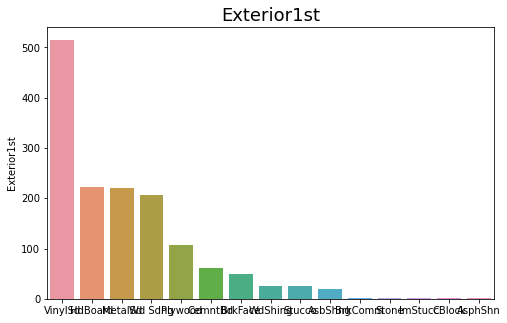

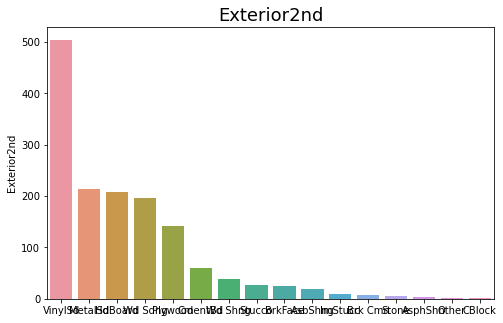

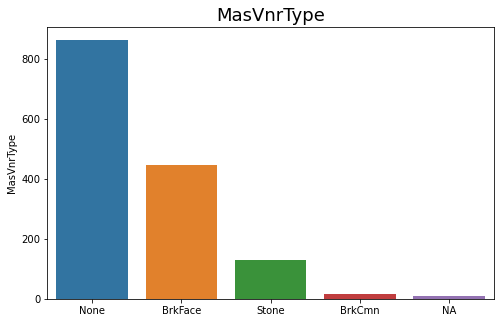

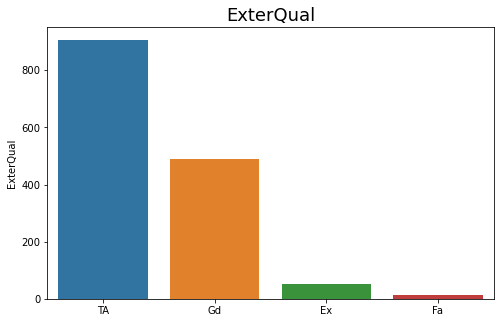

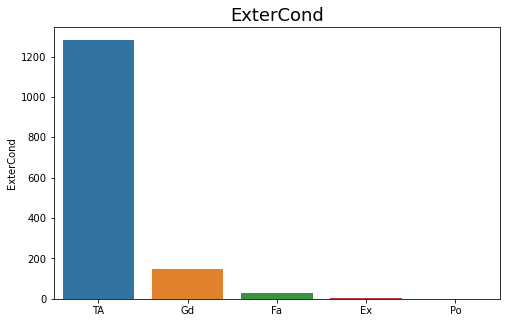

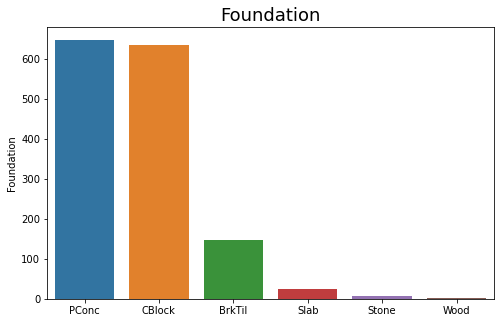

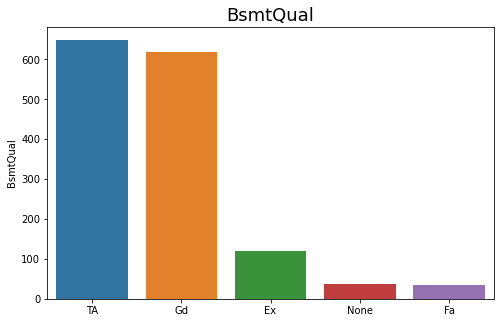

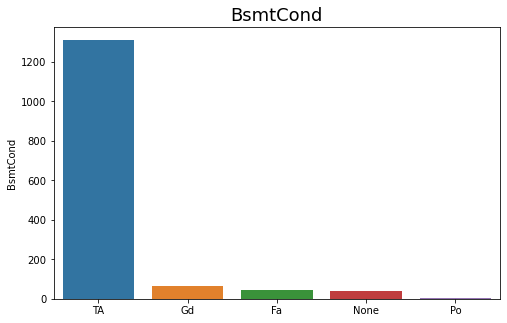

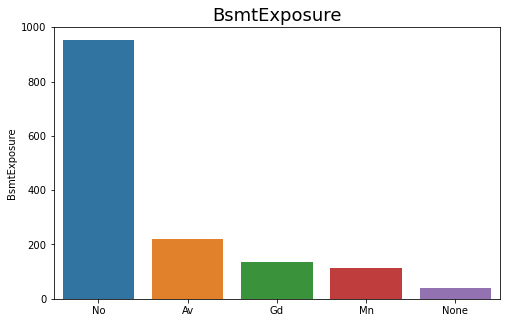

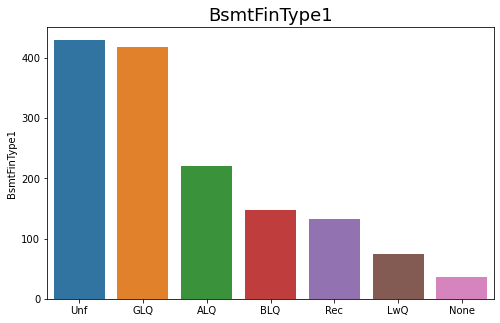

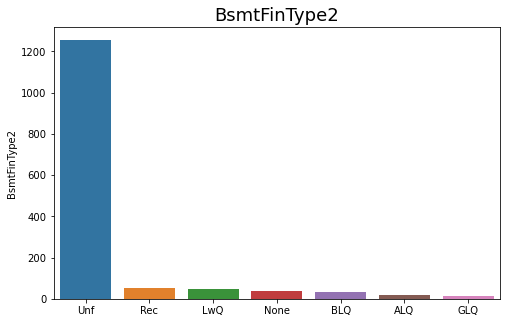

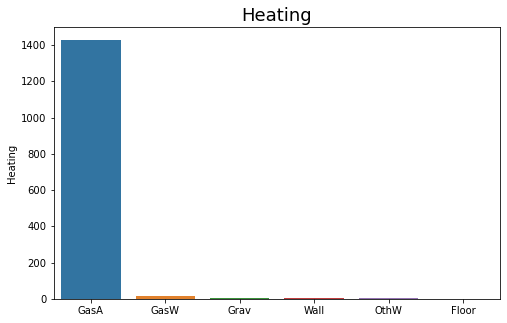

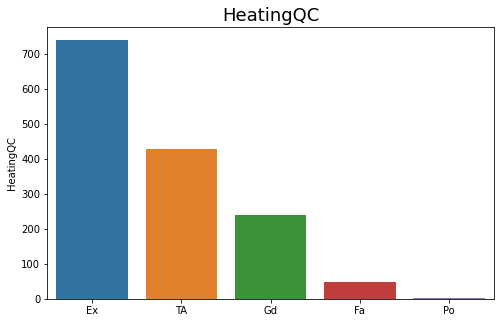

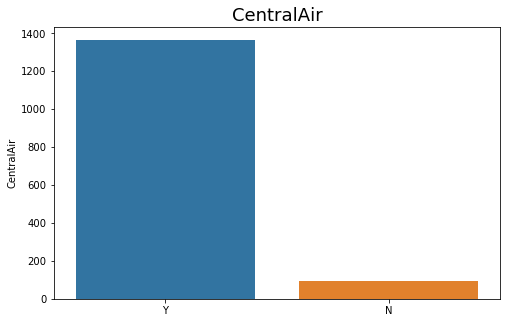

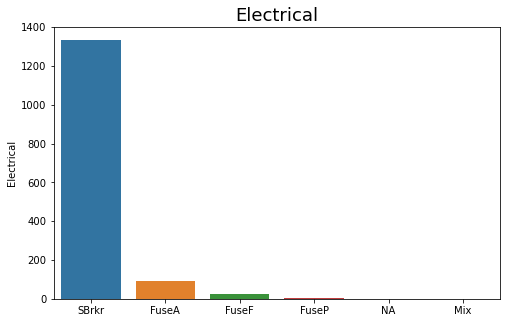

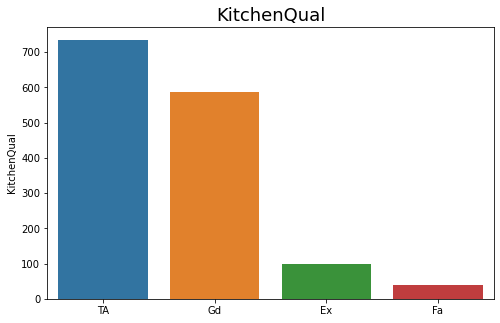

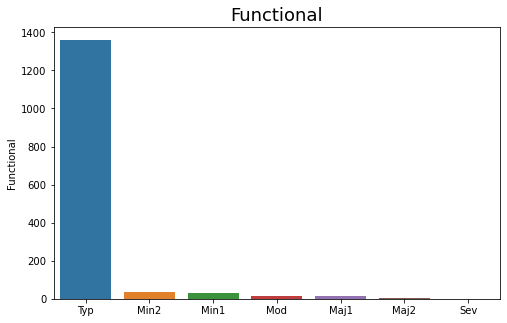

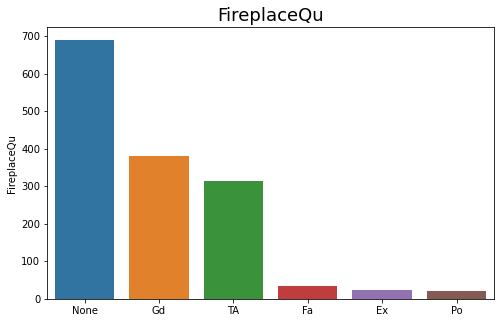

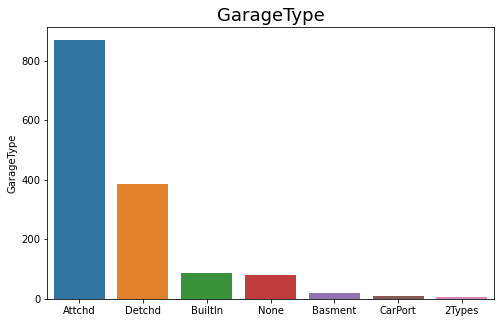

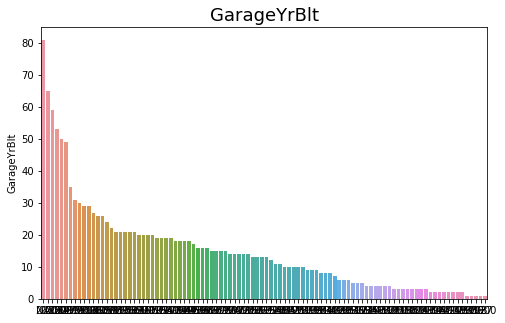

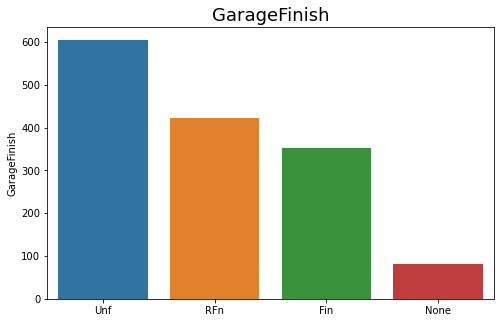

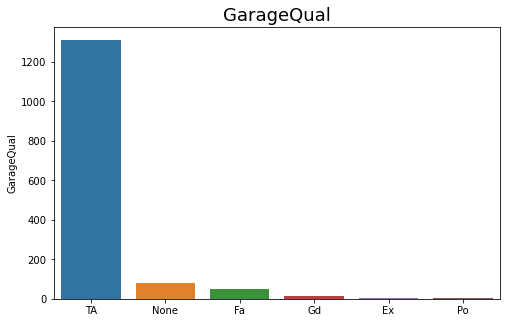

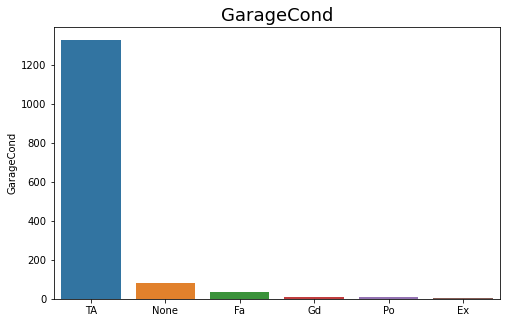

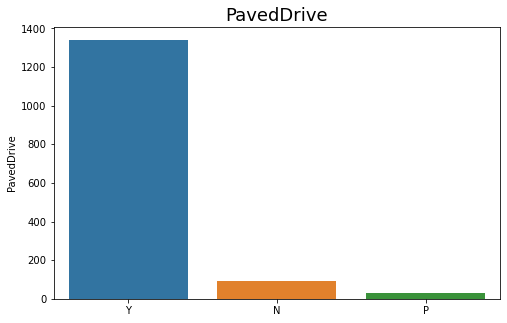

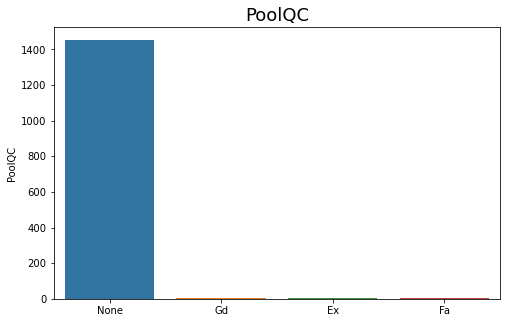

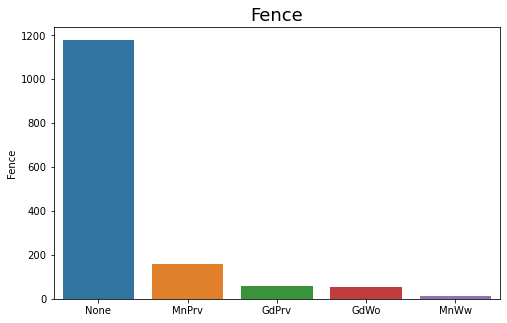

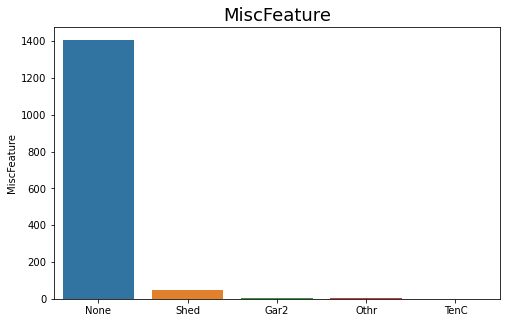

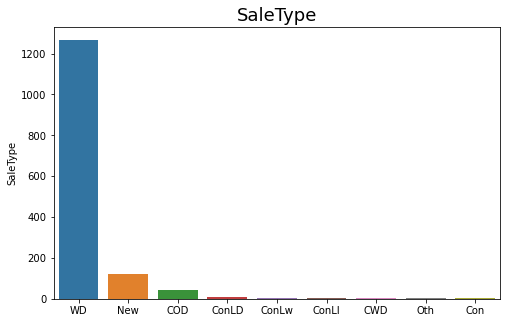

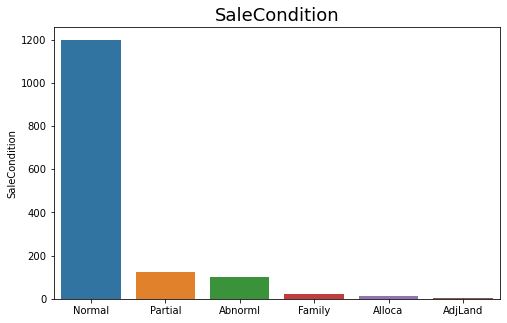

In [16]:
#visualize the levels
for col in df_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(df_cat[col].value_counts().index, df_cat[col].value_counts())
    plt.show()

## no columns have single unique value.

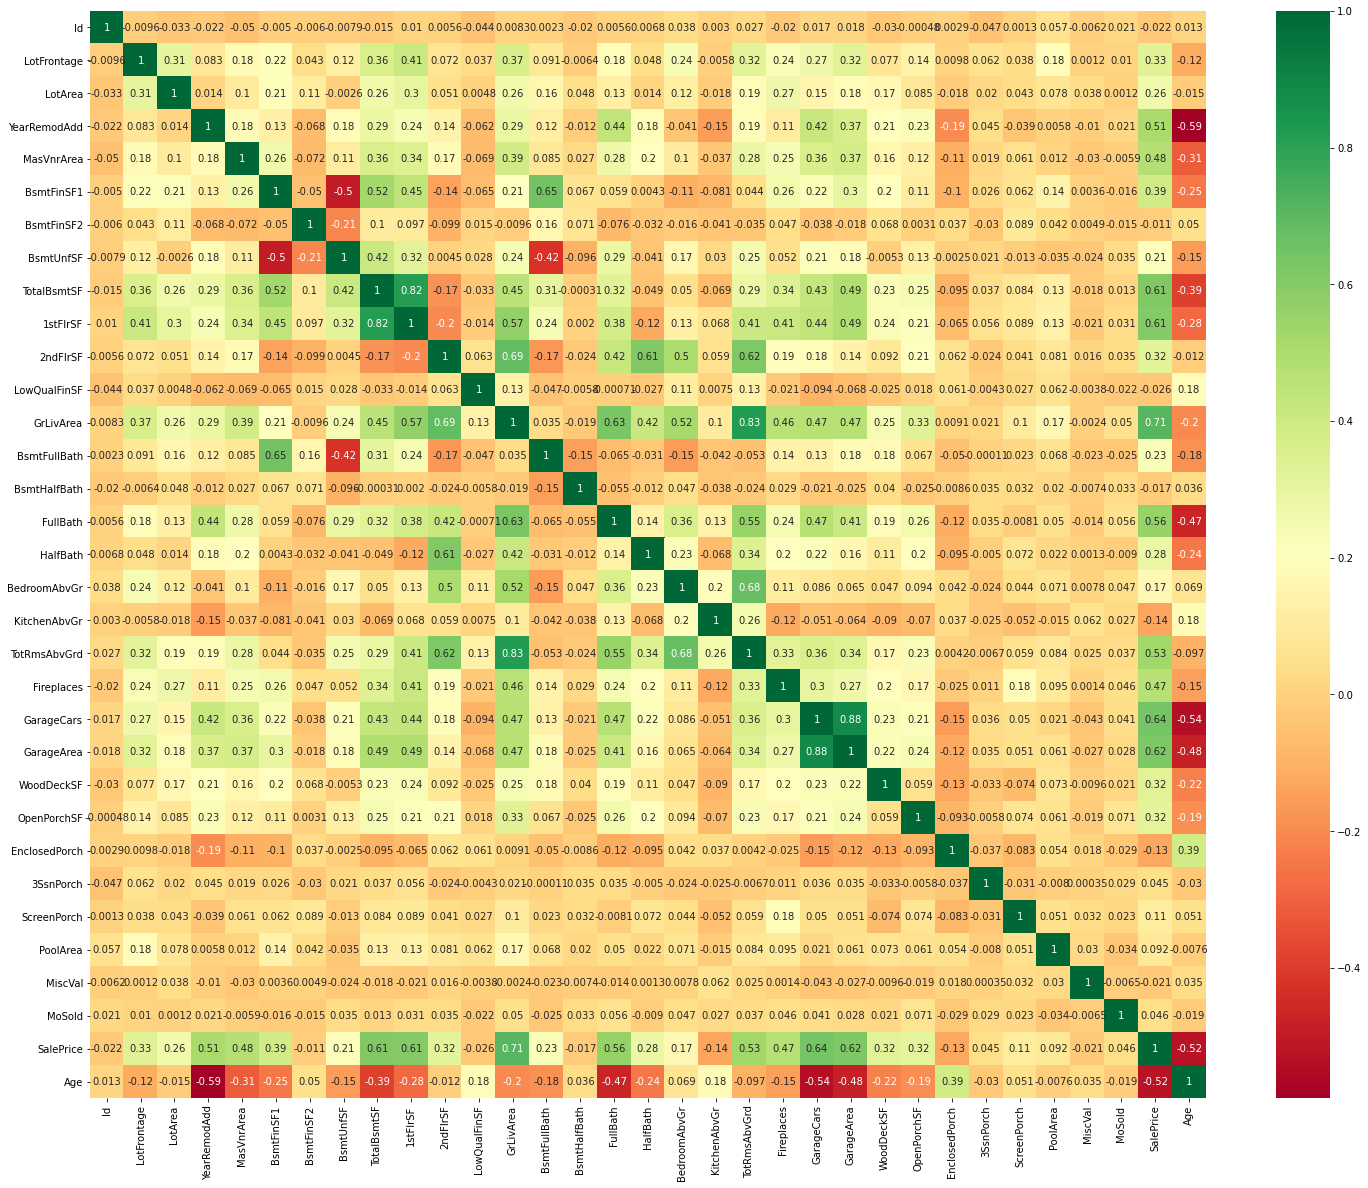

In [17]:
# Plot heatmap to detect correlations 
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap='RdYlGn');

- target variable 'salePrice' is highly correlated with 'GrLiveArea','GarageCars','GarageArea','TotalBsmtSF'


## Outlier treatment


<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

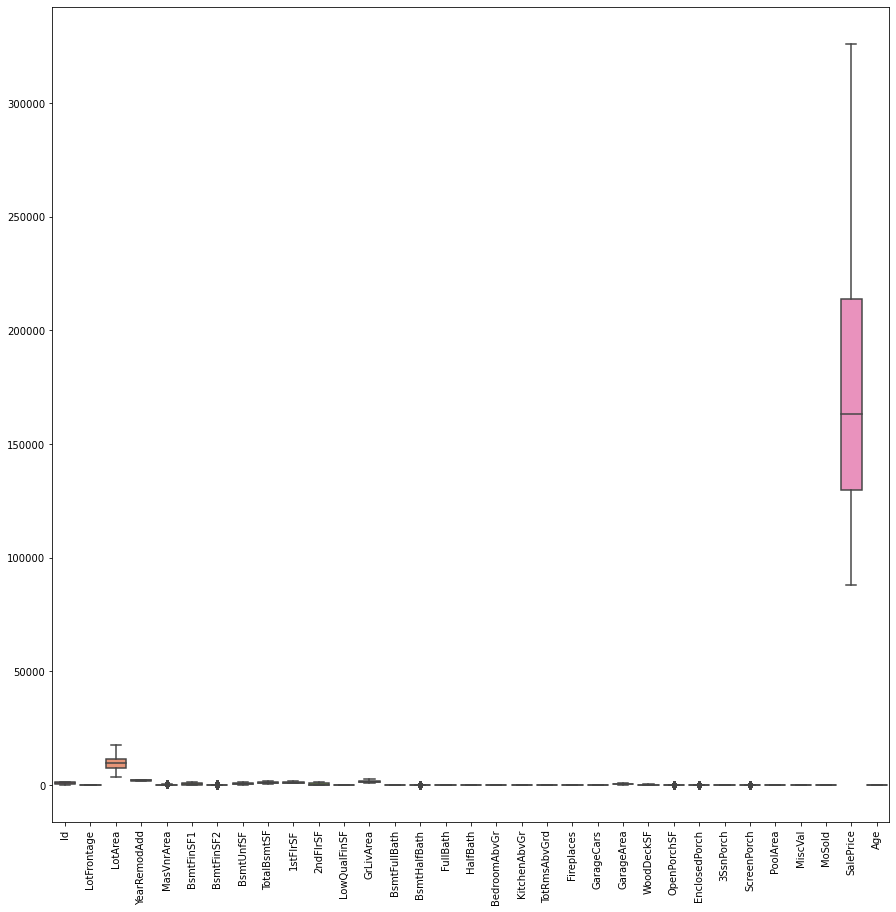

In [18]:
#capping outliers 
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)
    plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

## Dummy variable creation


In [19]:
df_dummy = pd.get_dummies(df_cat, drop_first=True)
df_dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,GarageYrBlt_1918,GarageYrBlt_1920,GarageYrBlt_1921,GarageYrBlt_1922,GarageYrBlt_1923,GarageYrBlt_1924,GarageYrBlt_1925,GarageYrBlt_1926,GarageYrBlt_1927,GarageYrBlt_1928,GarageYrBlt_1929,GarageYrBlt_1930,GarageYrBlt_1931,GarageYrBlt_1932,GarageYrBlt_1933,GarageYrBlt_1934,GarageYrBlt_1935,GarageYrBlt_1936,GarageYrBlt_1937,GarageYrBlt_1938,Garag

In [20]:
# Concatenate the outlier removed numerical columns with dummy var added categorical columns
df = pd.concat([df_num, df_dummy], axis=1)

df.head()

,Id,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,

# Building a model


In [21]:
#creating X as independent variable. Removing 'Id' since it is not useful and removing "SalePrice " since it is dependent variable
X=df.drop(["Id","SalePrice"],axis=1)
X.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,GarageYrBlt_1

In [22]:
#creating Y as target variable
y=df["SalePrice"]
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

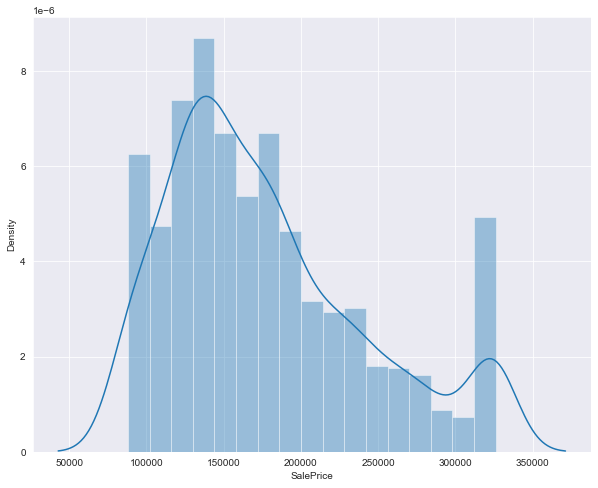

In [23]:
#Checking whether target variable is normally distributed
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);

In [24]:
df['SalePrice'].skew()


0.809360881526837

In [25]:
df['SalePrice'] = np.log(df['SalePrice'])
df['SalePrice'].skew()

0.16055685784475873

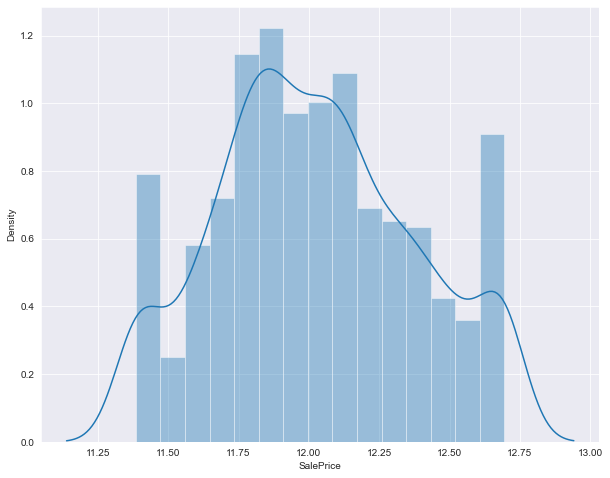

In [26]:
plt.figure(figsize=[10,8])
sns.distplot(df['SalePrice']);

In [27]:
y=df["SalePrice"]
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [28]:
# test train split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=100)

In [29]:
print(X_train.shape)
print(y_train.shape)

(1168, 384)
(1168,)


In [30]:
print(X_test.shape)
print(y_test.shape)

(292, 384)
(292,)


## Scaling numerical value

In [31]:
num_vars = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_vars

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [32]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train[num_vars]=scalar.fit_transform(X_train[num_vars])
X_test[num_vars]=scalar.fit_transform(X_test[num_vars])

# Ridge regression

In [33]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    2.4s finished


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [34]:
#optimal value of alpha
ridgeCV.best_params_

{'alpha': 10.0}

In [35]:
#results of cross validation
ridgeCV.cv_results_

{'mean_fit_time': array([0.0849062 , 0.06633677, 0.02508755, 0.02188053, 0.02415261,
        0.02694626, 0.02700696, 0.03201723, 0.02289677, 0.02619128,
        0.02608738, 0.02485476, 0.03016682, 0.02851763, 0.03914251,
        0.02973933, 0.02277389, 0.02562327, 0.02624364, 0.02603297,
        0.02456751, 0.02235832, 0.02816286, 0.0229537 , 0.02873912,
        0.02823362, 0.02711992, 0.02054601]),
 'std_fit_time': array([0.07149124, 0.07502752, 0.00766736, 0.00765209, 0.00817387,
        0.00687137, 0.00440622, 0.00578596, 0.00646731, 0.01108327,
        0.00723742, 0.0083775 , 0.00449916, 0.00564133, 0.01704947,
        0.00388765, 0.00431956, 0.00536482, 0.00345296, 0.00436586,
        0.00698059, 0.00635623, 0.00695138, 0.00698561, 0.00548232,
        0.00368212, 0.00962429, 0.00349753]),
 'mean_score_time': array([0.00776792, 0.00890455, 0.00312653, 0.00937686, 0.        ,
        0.00431395, 0.00913811, 0.00395803, 0.00657663, 0.00887623,
        0.00567126, 0.00879478, 0.010090

In [36]:
#fit the model on train data
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [37]:
#coefficient of ridge regression
ridge.coef_

array([ 3.80245912e-03,  2.21886678e-02,  2.53160180e-02, -2.77747207e-03,
        1.14303476e-02,  1.48442936e-03, -1.24157938e-02,  5.50635873e-02,
        1.96578344e-02,  3.93182278e-02,  0.00000000e+00,  7.58703435e-02,
        1.01330934e-02, -8.11955400e-04,  1.20426217e-02,  1.10987259e-02,
        9.58744671e-04,  0.00000000e+00, -2.86199366e-03,  1.17491341e-02,
        9.83028033e-03,  2.25710132e-02,  1.20986930e-02,  7.75634060e-03,
        2.96800631e-03,  0.00000000e+00,  7.01780182e-03,  0.00000000e+00,
        0.00000000e+00,  1.44742495e-03, -5.13571568e-02, -3.79752411e-02,
       -2.87630790e-03,  9.41828989e-04,  2.20795480e-03, -6.93243286e-03,
        3.96254441e-02,  1.52360642e-02,  5.62715292e-03,  1.23637292e-02,
       -2.62397317e-02,  3.08854175e-03, -4.86325858e-02, -2.42375438e-02,
       -2.00698951e-02,  4.51383312e-02,  2.36335617e-02,  1.73872830e-02,
       -2.44945684e-02, -5.75534611e-03, -4.39017054e-03,  1.35889595e-02,
        3.60291772e-03, -

In [38]:
# Predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [39]:
print("R-Squared (Train) =", r2_score(y_train, y_train_pred))
print("R-Squared (Test) =",  r2_score(y_test, y_pred))

R-Squared (Train) = 0.943050347106391
R-Squared (Test) = 0.9104920991003482


In [40]:
rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_pred))
print("RSS (Train) =", rss_train)
print("RSS (Test) =", rss_test)

RSS (Train) = 8.289297282901554
RSS (Test) = 3.220171006877317


In [41]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
print("MSE (Train) =",  mse_train)
print("MSE (Test) =", mse_test)

MSE (Train) = 0.007097001098374618
MSE (Test) = 0.011027982900264785


In [42]:
rmse_train = mse_train**0.5
rmse_test = mse_test**0.5
print("RMSE (Train) =",  rmse_train) 
print("RMSE (Test) =",  rmse_test) 

RMSE (Train) = 0.0842437006450608
RMSE (Test) = 0.10501420332633479


In [43]:
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.084906,0.071491,0.007768,0.007015,0.0001,{'alpha': 0.0001},-0.111553,-0.091095,-0.102948,-0.081774,-0.087958,-0.095066,0.010741,27,-0.044874,-0.049786,-0.049654,-0.051869,-0.050129,-0.049262,0.002334
1,0.066337,0.075028,0.008905,0.007325,0.001,{'alpha': 0.001},-0.111005,-0.089730,-0.102884,-0.081932,-0.087791,-0.094668,0.010661,26,-0.044889,-0.049821,-0.049656,-0.051891,-0.050134,-0.049278,0.002335
2,0.025088,0.007667,0.003127,0.006253,0.01,{'alpha': 0.01},-0.109728,-0.086436,-0.102304,-0.082194,-0.086450,-0.093422,0.010661,25,-0.044941,-0.050005,-0.049673,-0.051982,-0.050208,-0.049362,0.002351
3,0.021881,0.007652,0.009377,0.007656,0.05,{'alpha': 0.05},-0.107803,-0.084465,-0.100414,-0.081633,-0.084095,-0.091682,0.010457,23,-0.045099,-0.050438,-0.049752,-0.052147,-0.050671,-0.049621,0.002392
4,0.024153,0.008174,0.000000,0.000000,0.1,{'alpha': 0.1},-0.106045,-0.083431,-0.098742,-0.080917,-0.082413,-0.090310,0.010164,22,-0.045310,-0.050916,-0.049836,-0.052358,-0.051119,-0.049908,0.002434
5,0.026946,0.006871,0.004314,0.003542,0.2,{'alpha': 0.2},-0.103444,-0.082120,-0.096305,-0.079892,-0.080475,-0.088447,0.009627,21,-0.045816,-0.051634,-0.050030,-0.052766,-0.051849,-0.050419,0.002465
6,0.027007,0.004406,0.009138,0.003725,0.3,{'alpha': 0.3},-0.101612,-0.081045,-0.094542,-0.079010,-0.079458,-0.087133,0.009235,20,-0.046269,-0.052202,-0.050210,-0.053070,-0.052371,-0.050824,0.002468
7,0.032017,0.005786,0.003958,0.003835,0.4,{'alpha': 0.4},-0.100142,-0.080164,-0.093236,-0.078224,-0.078697,-0.086093,0.008946,19,-0.046655,-0.052662,-0.050371,-0.053353,-0.052789,-0.051166,0.002475
8,0.022897,0.006467,0.006577,0.005822,0.5,{'alpha': 0.5},-0.098994,-0.079456,-0.092116,-0.077515,-0.078171,-0.085250,0.008713,18,-0.047027,-0.053038,-0.050532,-0.053627,-0.053128,-0.051470,0.002469
9,0.026191,0.011083,0.008876,0.007925,0.6,{'alpha': 0.6},-0.098007,-0.078904,-0.091128,-0.076873,-0.077704,-0.084523,0.008509,17,-0.047360,-0.053352,-0.050685,-0.053878,-0.053421,-0.051739,0.002462


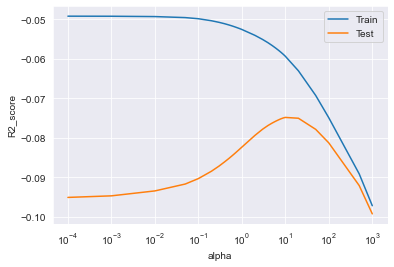

In [44]:
## Plotting R2 score vs alpha values

plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

### now train r2 score is decreasing when alpha is increasing. optimal value of alpha is 10 from the graph. After that test error is decreasing when alpha is increasing

# Lasso regression

In [45]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 125 out of 140 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [46]:
lassoCV.best_params_

{'alpha': 0.001}

In [47]:
lassoCV.cv_results_

{'mean_fit_time': array([0.22520914, 0.08704462, 0.04171391, 0.04167953, 0.04262962,
        0.03786721, 0.03135738, 0.04115105, 0.03161101, 0.0349627 ,
        0.03738122, 0.04008374, 0.0345449 , 0.03501291, 0.03517313,
        0.03194699, 0.03358002, 0.03543029, 0.03198528, 0.03751702,
        0.03944249, 0.03818192, 0.03784094, 0.0435503 , 0.0383913 ,
        0.03775773, 0.0350049 , 0.03248906]),
 'std_fit_time': array([0.04894492, 0.01780776, 0.00615819, 0.00871125, 0.00684422,
        0.00789799, 0.00021764, 0.00750617, 0.00044536, 0.00643264,
        0.00498986, 0.01437996, 0.00262347, 0.00699902, 0.00397423,
        0.00357993, 0.00810373, 0.0065693 , 0.004367  , 0.01224235,
        0.01660603, 0.00740968, 0.01262067, 0.00761339, 0.0072207 ,
        0.00667541, 0.00914849, 0.00166842]),
 'mean_score_time': array([0.01359687, 0.00615282, 0.01377573, 0.01520095, 0.01275978,
        0.01896534, 0.01271529, 0.00937562, 0.01562634, 0.0137804 ,
        0.01085038, 0.00328908, 0.016426

In [48]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [49]:
lasso.coef_

array([ 1.75050340e-03,  2.12846019e-02,  2.90711298e-02,  0.00000000e+00,
        2.36519057e-02,  2.81788628e-03, -4.73215991e-04,  5.44739964e-02,
        0.00000000e+00,  1.33742836e-02,  0.00000000e+00,  1.01413419e-01,
        1.07193101e-02,  0.00000000e+00,  3.89125516e-03,  9.38494641e-03,
       -0.00000000e+00,  0.00000000e+00, -8.31154036e-04,  1.83146313e-02,
        1.17534646e-02,  2.34972273e-02,  1.29992572e-02,  7.06357983e-03,
        3.18053722e-03,  0.00000000e+00,  6.63004707e-03,  0.00000000e+00,
        0.00000000e+00,  9.19319991e-05, -5.74626231e-02, -1.29885511e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.02071931e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.64556678e-02,  0.00000000e+00, -3.45454559e-02, -0.00000000e+00,
       -0.00000000e+00,  2.04666283e-02,  0.00000000e+00,  0.00000000e+00,
       -4.47372701e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [50]:
#predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [51]:
print("R-Squared (Train) =", r2_score(y_train, y_train_pred))
print("R-Squared (Test) =",  r2_score(y_test, y_pred))

rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_pred))
print("RSS (Train) =", rss_train)
print("RSS (Test) =", rss_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
print("MSE (Train) =",  mse_train)
print("MSE (Test) =", mse_test)

rmse_train = mse_train**0.5
rmse_test = mse_test**0.5
print("RMSE (Train) =",  rmse_train) 
print("RMSE (Test) =",  rmse_test) 

R-Squared (Train) = 0.9248361463597814
R-Squared (Test) = 0.9071258504969425
RSS (Train) = 10.940462252092058
RSS (Test) = 3.3412764740559164
MSE (Train) = 0.00936683411994183
MSE (Test) = 0.011442727650876425
RMSE (Train) = 0.09678240604542661
RMSE (Test) = 0.10697068594188047


In [52]:
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.225209,0.048945,0.013597,0.005042,0.0001,{'alpha': 0.0001},-0.087627,-0.073311,-0.080153,-0.068525,-0.071272,-0.076178,0.006895,2,-0.050132,-0.054762,-0.053390,-0.056114,-0.055312,-0.053942,0.002102
1,0.087045,0.017808,0.006153,0.005674,0.001,{'alpha': 0.001},-0.082694,-0.071269,-0.076328,-0.068669,-0.075590,-0.074910,0.004802,1,-0.066204,-0.070218,-0.067416,-0.069607,-0.069200,-0.068529,0.001491
2,0.041714,0.006158,0.013776,0.008002,0.01,{'alpha': 0.01},-0.102418,-0.092666,-0.098646,-0.096233,-0.102234,-0.098439,0.003701,3,-0.095744,-0.098162,-0.096481,-0.097010,-0.096715,-0.096822,0.000790
3,0.041680,0.008711,0.015201,0.005242,0.05,{'alpha': 0.05},-0.128553,-0.117941,-0.118241,-0.123961,-0.121273,-0.121994,0.003948,4,-0.118541,-0.123070,-0.119778,-0.121155,-0.120986,-0.120706,0.001511
4,0.042630,0.006844,0.012760,0.006400,0.1,{'alpha': 0.1},-0.169782,-0.163453,-0.155389,-0.163958,-0.157864,-0.162089,0.005045,5,-0.158598,-0.162034,-0.159643,-0.160437,-0.161505,-0.160444,0.001241
5,0.037867,0.007898,0.018965,0.006145,0.2,{'alpha': 0.2},-0.259480,-0.263652,-0.242222,-0.256275,-0.250066,-0.254339,0.007510,6,-0.253174,-0.253139,-0.252550,-0.252344,-0.253672,-0.252976,0.000476
6,0.031357,0.000218,0.012715,0.006362,0.3,{'alpha': 0.3},-0.296031,-0.300690,-0.279976,-0.293363,-0.287688,-0.291549,0.007152,7,-0.290076,-0.288160,-0.293778,-0.289557,-0.292110,-0.290736,0.001980
7,0.041151,0.007506,0.009376,0.007655,0.4,{'alpha': 0.4},-0.296031,-0.300690,-0.279976,-0.293363,-0.287688,-0.291549,0.007152,7,-0.290076,-0.288160,-0.293778,-0.289557,-0.292110,-0.290736,0.001980
8,0.031611,0.000445,0.015626,0.000005,0.5,{'alpha': 0.5},-0.296031,-0.300690,-0.279976,-0.293363,-0.287688,-0.291549,0.007152,7,-0.290076,-0.288160,-0.293778,-0.289557,-0.292110,-0.290736,0.001980
9,0.034963,0.006433,0.013780,0.007092,0.6,{'alpha': 0.6},-0.296031,-0.300690,-0.279976,-0.293363,-0.287688,-0.291549,0.007152,7,-0.290076,-0.288160,-0.293778,-0.289557,-0.292110,-0.290736,0.001980


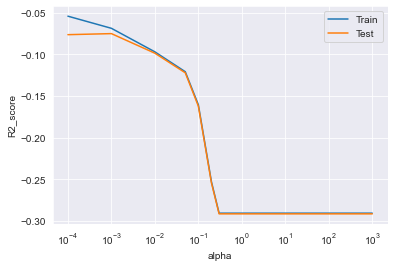

In [53]:
#Plot R2 score vs alpha 
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

### When alpha increases both train and test error decrases. after erreo value nearly 1, error value is constant.

## Comparing ridge and lasso results

* from the above metrics we know that all the values are almost similar in bothe ridge and lasso models.

In [54]:
#view the coefficients after regularization
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

,Ridge,Lasso
LotFrontage,0.003802,0.001751
LotArea,0.022189,0.021285
YearRemodAdd,0.025316,0.029071
MasVnrArea,-0.002777,0.000000
BsmtFinSF1,0.011430,0.023652
BsmtFinSF2,0.001484,0.002818
BsmtUnfSF,-0.012416,-0.000473
TotalBsmtSF,0.055064,0.054474
1stFlrSF,0.019658,0.000000
2ndFlrSF,0.039318,0.013374


In [55]:
#top 10 coefficients of ridge model
betas['Ridge'].sort_values(ascending=False)[:10]

Neighborhood_Crawfor    0.089784
OverallCond_9           0.078531
OverallQual_9           0.078129
GrLivArea               0.075870
OverallQual_8           0.074497
Functional_Typ          0.060839
TotalBsmtSF             0.055064
Exterior1st_BrkFace     0.053283
MSZoning_FV             0.045138
OverallCond_7           0.044962
Name: Ridge, dtype: float64

In [56]:
#top 10 coefficients of lasso model
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9           0.131487
OverallQual_8           0.109263
Neighborhood_Crawfor    0.104752
GrLivArea               0.101413
Functional_Typ          0.059058
TotalBsmtSF             0.054474
OverallQual_7           0.052528
Exterior1st_BrkFace     0.044816
Condition1_Norm         0.041859
CentralAir_Y            0.037858
Name: Lasso, dtype: float64

## Top variables singnificants are
OverallCond_9,OverallQual_9,Neighborhood_Crawfor,GrLivArea,OverallQual_8,Functional_Typ,TotalBsmtSF,Exterior1st_BrkFace,CentralAir_Y,TotalBsmtSF

## Optimal value of alpha in Ridge regression model is 10
## Optimal value of alpha in Lasso regression model is 0.001



# Answer of  question 1



In [241]:
# take the value of alpha as 20 (double)
ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [242]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [243]:
print("R-Squared (Train) =", r2_score(y_train, y_train_pred))
print("R-Squared (Test) =",  r2_score(y_test, y_pred))

rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_pred))
print("RSS (Train) =", rss_train)
print("RSS (Test) =", rss_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
print("MSE (Train) =",  mse_train)
print("MSE (Test) =", mse_test)

rmse_train = mse_train**0.5
rmse_test = mse_test**0.5
print("RMSE (Train) =",  rmse_train) 
print("RMSE (Test) =",  rmse_test) 

R-Squared (Train) = 0.9373697146436352
R-Squared (Test) = 0.9106236091471731
RSS (Train) = 9.116140798992046
RSS (Test) = 3.2154397503553556
MSE (Train) = 0.007804915067630176
MSE (Test) = 0.011011779966970395
RMSE (Train) = 0.08834543037209211
RMSE (Test) = 0.10493702857890724


In [244]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [245]:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [246]:
print("R-Squared (Train) =", r2_score(y_train, y_train_pred))
print("R-Squared (Test) =",  r2_score(y_test, y_pred))

rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_pred))
print("RSS (Train) =", rss_train)
print("RSS (Test) =", rss_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
print("MSE (Train) =",  mse_train)
print("MSE (Test) =", mse_test)

rmse_train = mse_train**0.5
rmse_test = mse_test**0.5
print("RMSE (Train) =",  rmse_train) 
print("RMSE (Test) =",  rmse_test) 

R-Squared (Train) = 0.9095658343089893
R-Squared (Test) = 0.8908808492488752
RSS (Train) = 13.163129990351347
RSS (Test) = 3.9257129483774325
MSE (Train) = 0.011269803073930948
MSE (Test) = 0.01344422242595011
RMSE (Train) = 0.10615932871835121
RMSE (Test) = 0.11594922348144515


## Changes in Ridge model
* R2 score of train is decreased from 0.94 to 0.93
* R2 score of test remains same


# Change in Lasso 
* R2 score of train is decreased from 0.92 to 0.90
* R2 score of test is decreased from 0.90 to 0.89

In [247]:
#view the coefficients after regularization
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

,Ridge,Lasso
LotFrontage,0.004606,0.002971
LotArea,0.022108,0.022584
YearRemodAdd,0.027726,0.037685
MasVnrArea,-0.000989,0.000000
BsmtFinSF1,0.015203,0.026104
BsmtFinSF2,0.002820,0.001709
BsmtUnfSF,-0.009425,-0.000000
TotalBsmtSF,0.052893,0.056259
1stFlrSF,0.021969,0.000000
2ndFlrSF,0.038137,0.013198


In [248]:
#top 10 coefficients of ridge model after alpha changed to 20
betas['Ridge'].sort_values(ascending=False)[:10]

Neighborhood_Crawfor    0.072913
GrLivArea               0.072156
OverallQual_8           0.067595
OverallQual_9           0.062396
Functional_Typ          0.054180
TotalBsmtSF             0.052893
OverallCond_9           0.052628
Exterior1st_BrkFace     0.043681
OverallCond_7           0.042872
SaleCondition_Normal    0.040790
Name: Ridge, dtype: float64

In [249]:
#top 10 coefficients of lasso model after changing alpha to 0.002
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea               0.101390
OverallQual_8           0.089649
OverallQual_9           0.083029
Neighborhood_Crawfor    0.077636
TotalBsmtSF             0.056259
Functional_Typ          0.055883
OverallQual_7           0.042577
YearRemodAdd            0.037685
Condition1_Norm         0.034409
CentralAir_Y            0.030450
Name: Lasso, dtype: float64

# Most important predictor after changing the alpha value are:
* GrLivArea 
* OverallQual_8
* OverallQual_9
* Exterior1st_BrkFace
* Neighborhood_Crawfor
* Functional_Typ

# Answer of question 3


In [250]:
Top=[ 'GrLivArea','OverallQual_9', 'OverallQual_8', 'Neighborhood_Crawfor', 'Exterior1st_BrkFace']

In [251]:
X_train_dropped = X_train.drop(Top, axis=1)
X_test_dropped = X_test.drop(Top, axis=1)

In [252]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [253]:
lassoCV.best_params_

{'alpha': 0.0001}

In [254]:
lasso = Lasso(alpha=0.0001)

In [255]:
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.0001)

In [256]:
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [257]:
print("R-Squared (Train) =", r2_score(y_train, y_train_pred))
print("R-Squared (Test) =",  r2_score(y_test, y_pred))

rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_pred))
print("RSS (Train) =", rss_train)
print("RSS (Test) =", rss_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
print("MSE (Train) =",  mse_train)
print("MSE (Test) =", mse_test)

rmse_train = mse_train**0.5
rmse_test = mse_test**0.5
print("RMSE (Train) =",  rmse_train) 
print("RMSE (Test) =",  rmse_test)

R-Squared (Train) = 0.9501196557353507
R-Squared (Test) = 0.8294154548295852
RSS (Train) = 7.260325237725065
RSS (Test) = 6.1370158506449854
MSE (Train) = 0.006216031881613925
MSE (Test) = 0.021017177570702004
RMSE (Train) = 0.07884181556518043
RMSE (Test) = 0.14497302359646777


In [258]:
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas['Lasso'] = lasso.coef_
betas

,Lasso
LotFrontage,0.003649
LotArea,0.025735
YearRemodAdd,0.021148
MasVnrArea,0.000486
BsmtFinSF1,0.020131
BsmtFinSF2,0.005889
BsmtUnfSF,-0.004310
TotalBsmtSF,0.050045
1stFlrSF,0.072527
2ndFlrSF,0.097830


In [259]:
betas['Lasso'].sort_values(ascending=False)[:5]

Condition2_PosA    0.305310
OverallCond_9      0.160792
SaleType_ConLD     0.138839
2ndFlrSF           0.097830
OverallCond_8      0.096497
Name: Lasso, dtype: float64

## After dropping top 5 lasso predictor, following are the new top predictor
* Condition2_PosA
* OverallCond_9 
* SaleType_ConLD
* 2ndFlrSF
* OverallCond_8